In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})

In [6]:
!wget https://covid.ourworldindata.org/data/ecdc/total_cases.csv

--2020-07-25 13:31:34--  https://covid.ourworldindata.org/data/ecdc/total_cases.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 206.189.89.118, 128.199.185.38, 2400:6180:0:d1::4d8:4001, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|206.189.89.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148486 (145K) [text/csv]
Saving to: ‘total_cases.csv’

total_cases.csv     100%[===================>] 145.01K  --.-KB/s    in 0.1s    

2020-07-25 13:31:35 (975 KB/s) - ‘total_cases.csv’ saved [148486/148486]



In [11]:
df_cases = pd.read_csv('total_cases.csv', parse_dates=[0,])
df_cases.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [37]:
df_post_covid = pd.read_csv('last240Days_emo.csv', parse_dates=[5])
df_post_covid.head()

,Post ID,Title,URL,Author,Score,Publish Date,Total number of comments,Permalink,Flair,Language,isCovid,Day,Emoji
0,ei54wv,China investigates SARS-like virus as 27 struc...,https://www.taiwannews.com.tw/en/news/3847781,crabmeat2,1,2019-12-31 17:35:02,1,/r/worldnews/comments/ei54wv/china_investigate...,NaN,en,True,2019-12-31,😷 😖 😣 😠 😓
1,eib9ut,A scary unidentified virus is spreading in China,https://bgr.com/2019/12/31/china-pneumonia-sic...,skippy_smooth,1,2020-01-01 01:21:23,70,/r/worldnews/comments/eib9ut/a_scary_unidentif...,NaN,en,True,2020-01-01,😖 😷 😳 😣 😫
2,eikpfp,China probes mystery pneumonia outbreak amid S...,https://news.yahoo.com/china-probes-pneumonia-...,LefthandedLunatic,1,2020-01-01 18:14:34,5,/r/worldnews/comments/eikpfp/china_probes_myst...,NaN,en,True,2020-01-01,🎶 😷 🎵 😖 💀
3,eimhbw,China investigates SARS-like virus as dozens s...,https://www.dw.com/en/china-investigates-sars-...,dont_come_any_closer,1,2020-01-01 20:29:24,7,/r/worldnews/comments/eimhbw/china_investigate...,NaN,en,True,2020-01-01,😷 😖 😣 😪 😓
4,eiwl41,China on high alert following outbreak of SARS...,https://www.news.com.au/lifestyle/health/healt...,vik0_tal,1,2020-01-02 11:23:58,2,/r/worldnews/comments/eiwl41/china_on_high_ale...,NaN,en,True,2020-01-02,😷 😖 😳 😐 😡


In [38]:
df_post_nonCovid = pd.read_csv('last240Days_emo_noCovid.csv', parse_dates=[5])
df_post_nonCovid.head()

,Post ID,Title,URL,Author,Score,Publish Date,Total number of comments,Permalink,Flair,Language,isCovid,Day,Emoji
0,ehtq7g,Tesla delivers first China-made Model 3s to it...,https://edition.cnn.com/2019/12/30/tech/tesla-...,andrzej1220,1,2019-12-31 00:00:30,4,/r/worldnews/comments/ehtq7g/tesla_delivers_fi...,NaN,en,NaN,2019-12-31,👏 🙌 👍 👌 😍
1,ehtquq,Taiwan's citizens battle pro-China fake news c...,https://www.theguardian.com/world/2019/dec/30/...,cc_hk,1,2019-12-31 00:01:40,0,/r/worldnews/comments/ehtquq/taiwans_citizens_...,NaN,en,NaN,2019-12-31,😡 😠 👍 😬 😕
2,ehtrmf,"""Targeted For My Religion But Never Made An Is...",https://sports.ndtv.com/cricket/danish-kaneria...,caraded,1,2019-12-31 00:03:20,0,/r/worldnews/comments/ehtrmf/targeted_for_my_r...,NaN,en,NaN,2019-12-31,🎵 🙌 💓 🙏 💛
3,ehtyhq,Nissan's ex-head Carlos Ghosn in surprise Leba...,https://www.bbc.com/news/business-50952335,temporarycreature,1,2019-12-31 00:17:24,1,/r/worldnews/comments/ehtyhq/nissans_exhead_ca...,NaN,en,NaN,2019-12-31,💓 💛 😍 😄 👍
4,ehtykg,Trump missed call on Ukraine aid to play golf ...,https://www.salon.com/2019/12/30/trump-missed-...,maxwellhill,1,2019-12-31 00:17:33,82,/r/worldnews/comments/ehtykg/trump_missed_call...,Trump,en,NaN,2019-12-31,😡 😠 😐 😕 👍


## 1. Posts vs cases over time

In [39]:
# calculating cumulative post count
df_post_covid = df_post_covid.reset_index()
df_post_covid["Count"] = df_post_covid["index"]+1
df_post_covid.drop('index', axis=1, inplace=True)

df_post_nonCovid = df_post_nonCovid.reset_index()
df_post_nonCovid["Count"] = df_post_nonCovid["index"]+1
df_post_nonCovid.drop('index', axis=1, inplace=True)

df_post_covid.head(3)

,Post ID,Title,URL,Author,Score,Publish Date,Total number of comments,Permalink,Flair,Language,isCovid,Day,Emoji,Count
0,ei54wv,China investigates SARS-like virus as 27 struc...,https://www.taiwannews.com.tw/en/news/3847781,crabmeat2,1,2019-12-31 17:35:02,1,/r/worldnews/comments/ei54wv/china_investigate...,NaN,en,True,2019-12-31,😷 😖 😣 😠 😓,1
1,eib9ut,A scary unidentified virus is spreading in China,https://bgr.com/2019/12/31/china-pneumonia-sic...,skippy_smooth,1,2020-01-01 01:21:23,70,/r/worldnews/comments/eib9ut/a_scary_unidentif...,NaN,en,True,2020-01-01,😖 😷 😳 😣 😫,2
2,eikpfp,China probes mystery pneumonia outbreak amid S...,https://news.yahoo.com/china-probes-pneumonia-...,LefthandedLunatic,1,2020-01-01 18:14:34,5,/r/worldnews/comments/eikpfp/china_probes_myst...,NaN,en,True,2020-01-01,🎶 😷 🎵 😖 💀,3


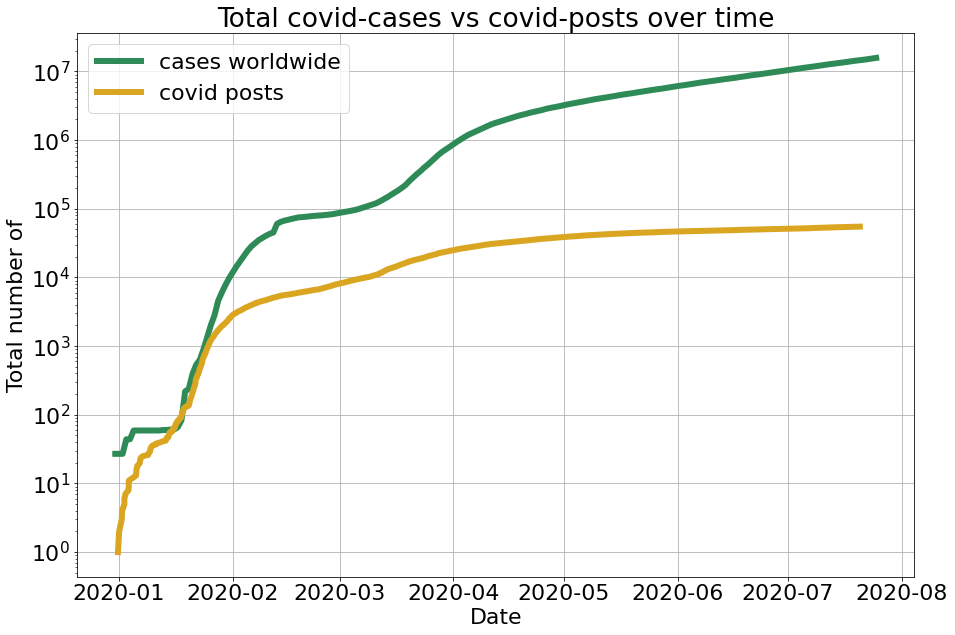

In [108]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(df_cases.date, df_cases.World, color='seagreen', linewidth=6, label="cases worldwide")
ax.plot(df_post_covid["Publish Date"], df_post_covid["Count"], color='goldenrod', linewidth=6, label="covid posts")
ax.set(yscale='log', title="Total covid-cases vs covid-posts over time", xlabel="Date", ylabel="Total number of")
ax.legend()
ax.grid()

plt.show()

## 2. Covid posts on r/worldnews

In [65]:
names = ["Day", "Count"]
covid_per_day = df_post_covid.resample('D', on='Publish Date').count()["Post ID"].reset_index()
covid_per_day.columns = names

nonCovid_per_day = df_post_nonCovid.resample('D', on='Publish Date').count()["Post ID"].reset_index()
nonCovid_per_day.columns = names

covid_per_day.tail()

,Day,Count
198,2020-07-16,211
199,2020-07-17,180
200,2020-07-18,131
201,2020-07-19,128
202,2020-07-20,94


In [90]:
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%Y-%m')

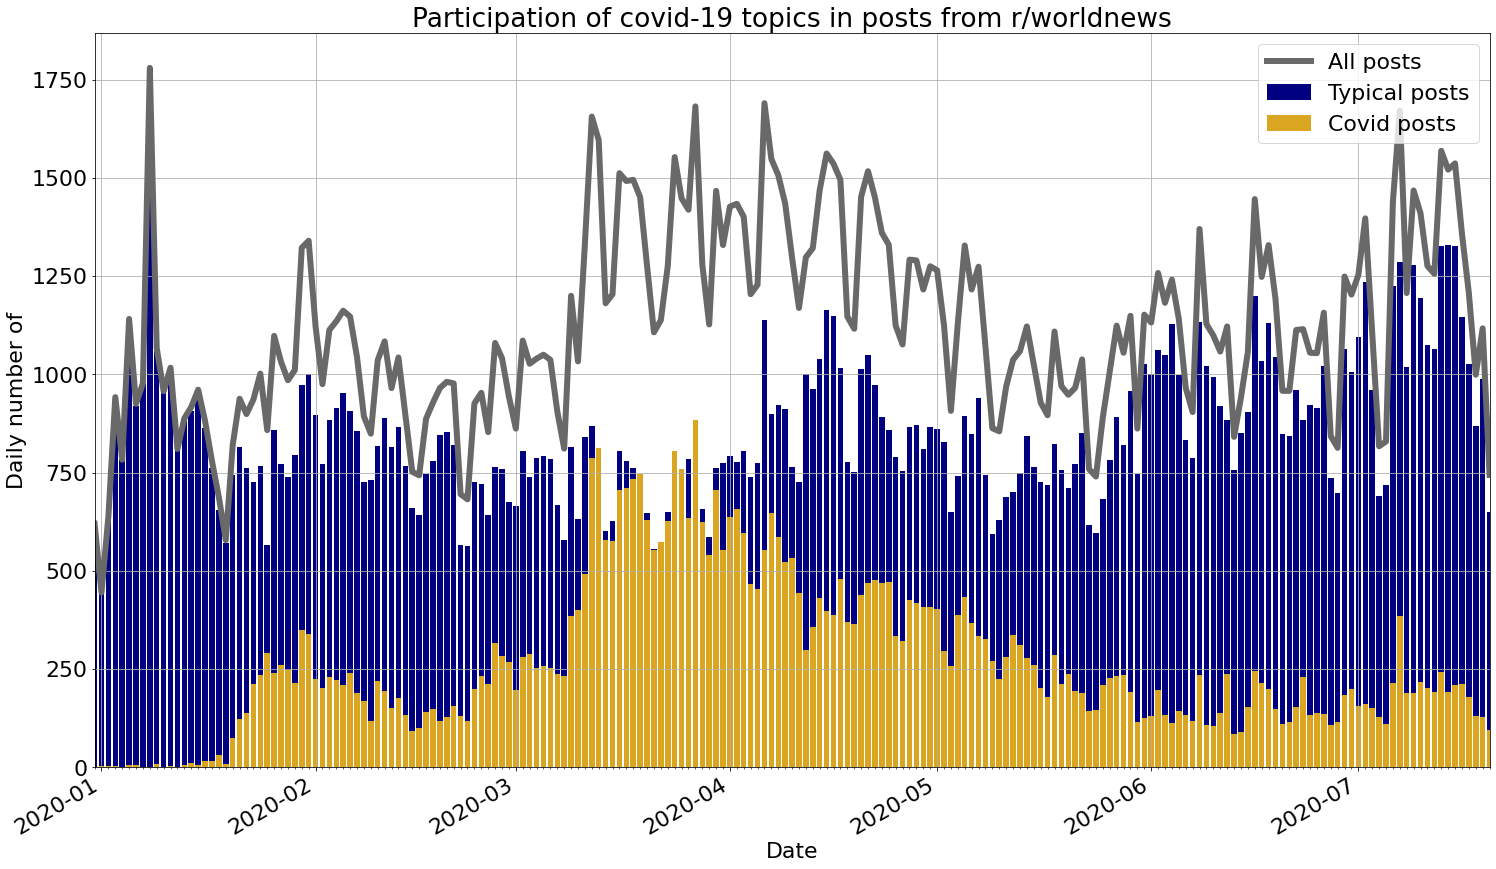

In [119]:
fig, ax = plt.subplots(figsize=(25,15))

ax.bar(nonCovid_per_day.Day, nonCovid_per_day.Count, color='navy', label="Typical posts")
ax.bar(covid_per_day.Day, covid_per_day.Count, color='goldenrod', label="Covid posts")
ax.plot(nonCovid_per_day.Day, nonCovid_per_day.Count+covid_per_day.Count, color='dimgray', linewidth=6, label="All posts")

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

datemin = covid_per_day.Day.min()
datemax = covid_per_day.Day.max()
ax.set_xlim(datemin, datemax)

ax.set(xlabel="Date", ylabel="Daily number of", title="Participation of covid-19 topics in posts from r/worldnews")

ax.legend()
ax.grid()

fig.autofmt_xdate()
plt.show()